In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

References used:

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Here I checked the read_csv documentation to help with importing the data correctly using the names keyword argument to add headers to my columns.

In [72]:
data = pd.read_csv(
    './iris/iris.data',
    names=[
        'Sepal Length in cm',
        'Sepal Width in cm',
        'Petal Length in cm',
        'Petal Width in cm',
        'Class'
    ]
)

data

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Creating variables for use later.

In [73]:
sepal_length = data['Sepal Length in cm']
sepal_width = data['Sepal Width in cm']
petal_length = data['Petal Length in cm']
petal_width = data['Petal Width in cm']

- https://www.geeksforgeeks.org/how-to-export-pandas-dataframe-to-a-csv-file/

Here I checked a reference to see how to export to csv file.

In [74]:
data.describe().to_csv('iris.describe',sep=',')


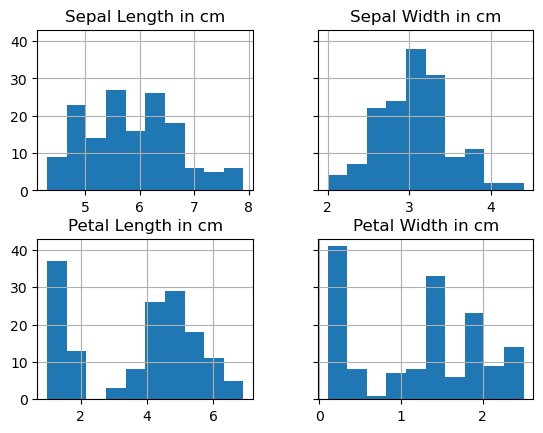

In [75]:
histogram = data.hist(sharey=True)
histogram 
plt.savefig('histogram.png')
plt.show()


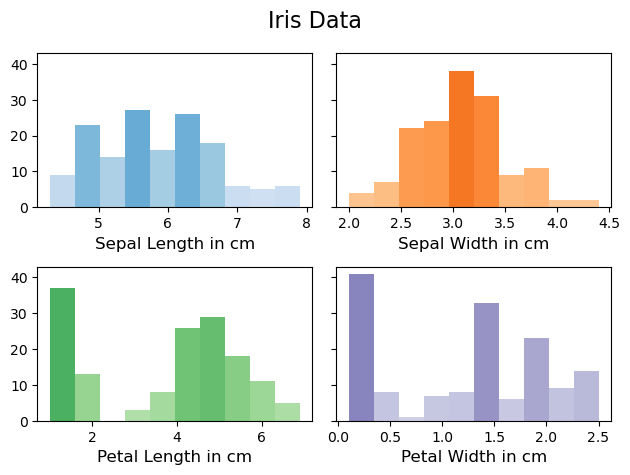

In [76]:
fig, ax = plt.subplots(2,2, tight_layout=True, sharey=True)

N, bins, patches = ax[0,0].hist(x=data['Sepal Length in cm'])
ax[0,0].set_xlabel('Sepal Length in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Blues(norm(thisfrac*0.3+0.3))
    thispatch.set_facecolor(colour)

N, bins, patches = ax[0,1].hist(x=data['Sepal Width in cm'])
ax[0,1].set_xlabel('Sepal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Oranges(norm(thisfrac*0.3+0.3))
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,0].hist(x=data['Petal Length in cm'])
ax[1,0].set_xlabel('Petal Length in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Greens(norm(thisfrac*0.3+0.3))
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,1].hist(x=data['Petal Width in cm'])
ax[1,1].set_xlabel('Petal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Purples(norm(thisfrac*0.3+0.3))
    thispatch.set_facecolor(colour)

fig.suptitle('Iris Data', fontsize=16)

plt.savefig('histogram.png')
plt.show()


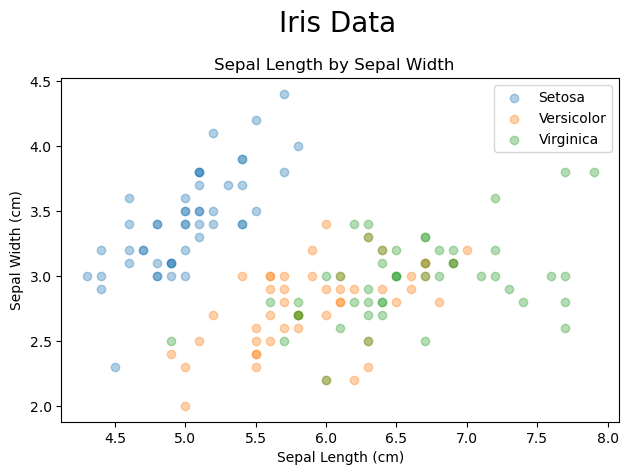

In [77]:
# Creating a single plot with adjusted padding.

fig, ax = plt.subplots(tight_layout=True)

# Creating scatter plots for each of the target variables in different colours on the same axis.
# Using c= to set marker colour for each rather than using colour mapping as array.

ax.scatter(sepal_length[0:49],sepal_width[0:49], c='tab:blue', label='Setosa', alpha=0.35)
ax.scatter(sepal_length[50:99],sepal_width[50:99], c='tab:orange', label='Versicolor', alpha=0.35)
ax.scatter(sepal_length[100:149],sepal_width[100:149], c='tab:green', label='Virginica', alpha=0.35)

# Setting labels for the axis.

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.

ax.legend()

# Setting title for figure and plot.

plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

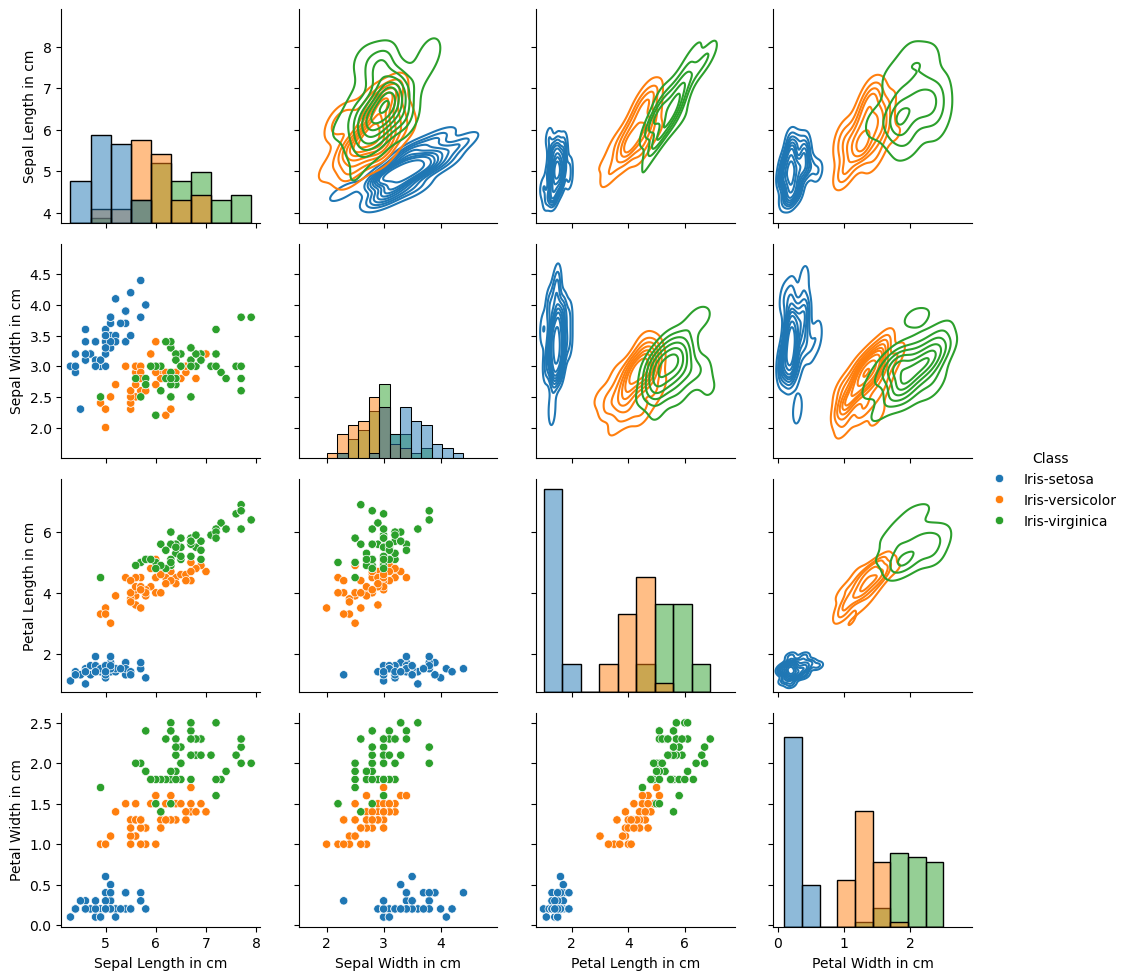

In [106]:
grid = sb.PairGrid(data, hue='Class')
grid.map_upper(sns.kdeplot)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot)
grid.add_legend()

grid

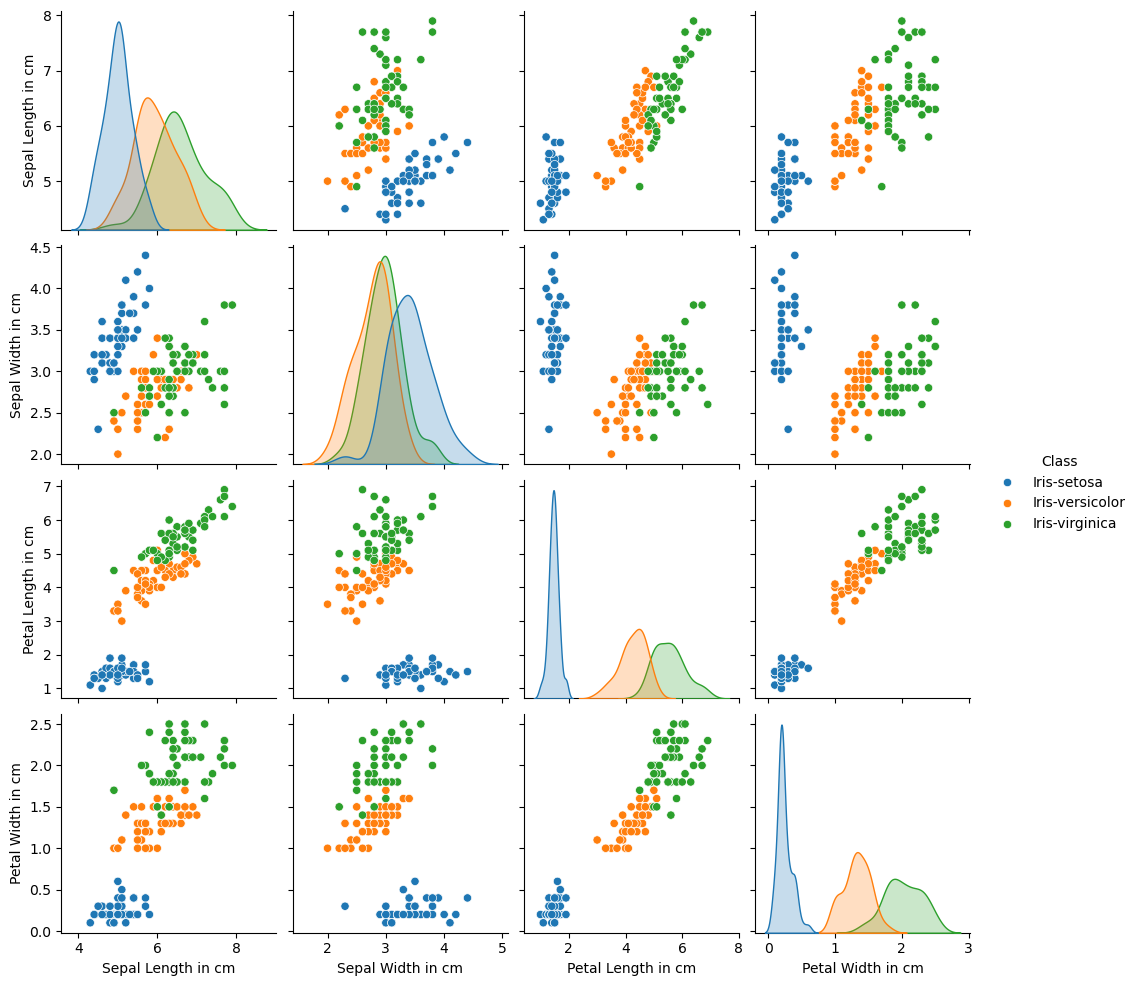

In [ ]:
grid = sns.pairplot(data, hue='Class')

- https://seaborn.pydata.org/generated/seaborn.pairplot.html

Looking through the seaborn documentation for pairplot, I found the hue keyword argument which I implemented here to separate the classes in the displayed pair plot.

- https://seaborn.pydata.org/generated/seaborn.PairGrid.html



In [ ]:
grid

1. Outputs a summary of each variable to a single text file,

2. Saves a histogram of each variable to png files, and

3. Outputs a scatter plot of each pair of variables.

4. Performs any other analysis you think is appropriate.